In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *
from fastai.script import *

from data_utils import *
from models import *
from learn_utils import *

In [3]:
torch.cuda.set_device(7)

In [4]:
data_dict

{'notl_brain_mr': <function data_utils.get_notl_brain_mr_data()>,
 'notl_brain_ct': <function data_utils.get_notl_brain_ct_data()>,
 'atlas_brain_mr': <function data_utils.get_atlas_brain_mr_data()>,
 'notl_ventricle_mr': <function data_utils.get_notl_ventricle_mr_data()>,
 'notl_ventricle_ct': <function data_utils.get_notl_ventricle_ct_data()>,
 'atlas_ventricle_mr': <function data_utils.get_atlas_ventricle_mr_data()>}

In [39]:
train_paths, valid_paths, test1_paths, test2_paths = data_dict['notl_ventricle_mr']()

In [40]:
paths = {"train":train_paths, "valid":valid_paths, "test1":test1_paths, "test2":test2_paths}

In [41]:
mode = "test2"

In [42]:
images = [np.load(fn) for fn in paths[mode][0]]
masks = [np.load(fn) for fn in paths[mode][1]]

In [43]:
len(images)

19

In [44]:
def yield_start():
    for i in np.arange(0, len(images), 8): yield i
next_start = yield_start()

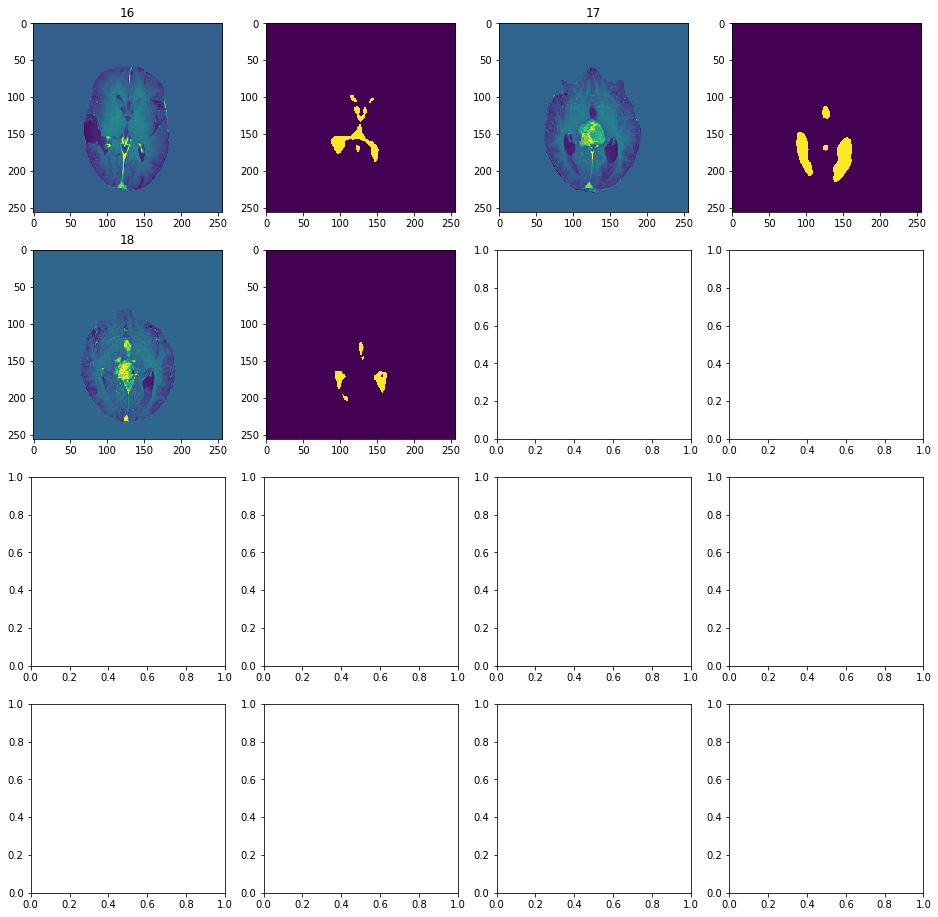

In [47]:
slice_no = 64
n = 4
start = next(next_start)

fig, axes = plt.subplots(n,n, figsize=(n*4,n*4))
ax = axes.flatten()
for im_no, (i, im, ms) in enumerate(zip(range(0,20,2), images[start:start+n*2], masks[start:start+n*2])):
    ax[i].imshow(im[slice_no])
    ax[i].set_title(f"{start+im_no}")
    ax[i+1].imshow(ms[slice_no])

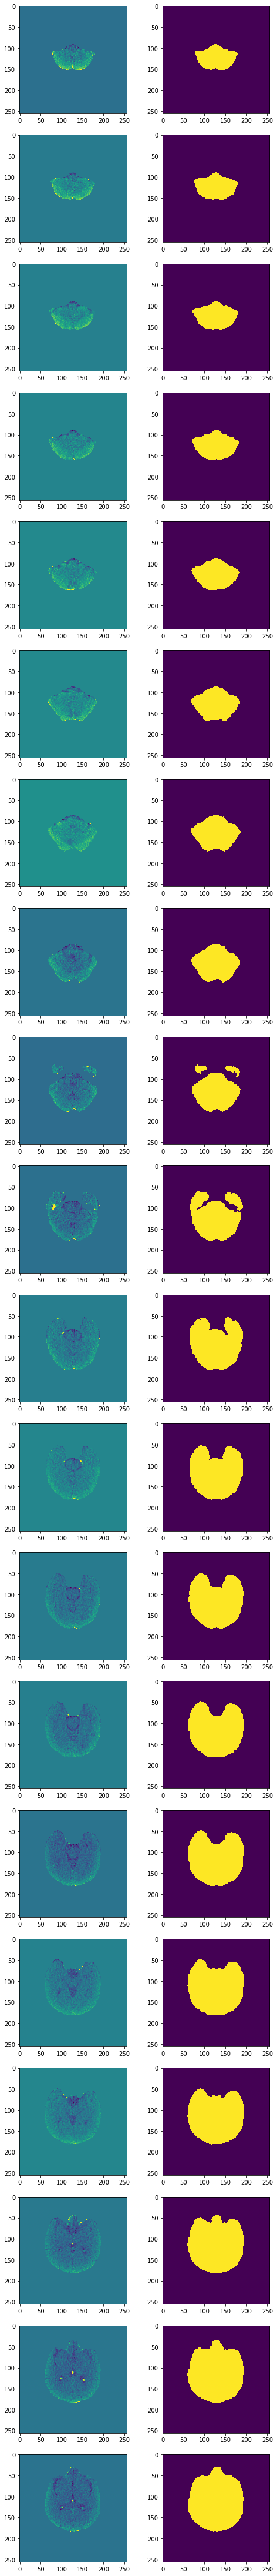

In [104]:
bad_im_no = 62
fig, axes = plt.subplots(20, 2, figsize=(2*4, 20*4))
for ax, im, ms in zip(axes, images[bad_im_no][50:70], masks[bad_im_no][50:70]):
    ax[0].imshow(im)
    ax[1].imshow(ms)

In [105]:
paths[mode][0][bad_im_no]

PosixPath('../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')

In [106]:
paths[mode][1][bad_im_no]

PosixPath('../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')

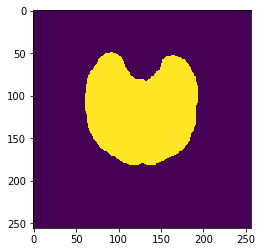

In [108]:
plt.imshow(np.load('/data/public/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')[64])

**remove list**

Images that have brain mask when they named as ventricle mask

**1)**

'../../data/Segmentation_Dataset/MR_Dataset/test2/skull_stripped_v2/MR-Test-007_20180503105547.000_2.16.840_181.2333_RTst_2018-05-03_105547_MR.BRAINNAV.WITH.DTI_._n1__00000_MR.npy'

'../../data/Segmentation_Dataset/MR_Dataset/test2/ventricle_masks/MR-Test-007_20180503105547.000_2.16.840_181.2333_RTst_2018-05-03_105547_MR.BRAINNAV.WITH.DTI_._n1__00000_MR.npy']

plt.imshow(np.load('/data/public/Segmentation_Dataset/MR_Dataset/test2/ventricle_masks/MR-Test-007_20180503105547.000_2.16.840_181.2333_RTst_2018-05-03_105547_MR.BRAINNAV.WITH.DTI_._n1__00000_MR.npy')[64])

**2)**

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON21830_20170424163124.562000_2.16.840_615.9543_RTst_2017-04-24_163124_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON21830_20170424163124.562000_2.16.840_615.9543_RTst_2017-04-24_163124_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

plt.imshow(np.load('/data/public/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON21830_20170424163124.562000_2.16.840_615.9543_RTst_2017-04-24_163124_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')[64])

**3)**

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON31835_20160531144154.968000_2.16.840_093.7572_RTst_2016-05-31_144154_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON31835_20160531144154.968000_2.16.840_093.7572_RTst_2016-05-31_144154_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

plt.imshow(np.load('/data/public/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON31835_20160531144154.968000_2.16.840_093.7572_RTst_2016-05-31_144154_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')[64])


**4)**

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy'

plt.imshow(np.load('/data/public/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy')[64])

In [37]:
remove_list = ['../../data/Segmentation_Dataset/MR_Dataset/test2/skull_stripped_v2/MR-Test-007_20180503105547.000_2.16.840_181.2333_RTst_2018-05-03_105547_MR.BRAINNAV.WITH.DTI_._n1__00000_MR.npy',

'../../data/Segmentation_Dataset/MR_Dataset/test2/ventricle_masks/MR-Test-007_20180503105547.000_2.16.840_181.2333_RTst_2018-05-03_105547_MR.BRAINNAV.WITH.DTI_._n1__00000_MR.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON21830_20170424163124.562000_2.16.840_615.9543_RTst_2017-04-24_163124_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON21830_20170424163124.562000_2.16.840_615.9543_RTst_2017-04-24_163124_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON31835_20160531144154.968000_2.16.840_093.7572_RTst_2016-05-31_144154_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON31835_20160531144154.968000_2.16.840_093.7572_RTst_2016-05-31_144154_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/skull_stripped_v2/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy',

'../../data/Segmentation_Dataset/CT_Dataset/train/ventricle_masks/ANON61429_20170202142737.828000_2.16.840_835.7252_RTst_2017-02-02_142737_RT^LUNG.(Adult)_Atlas.Generated.Contours.CT_n1__00000_CT.npy']



In [38]:
for fn in remove_list: os.remove(fn)

### Notes

One possible reason for bad performance on big ventricles is that, test contains hard cases such as big ventricles or deformed brain whereas valid and train lacks such images. Possble solution is to add such images to valid and do data augmentation in train.